In [652]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans #hanya digunakan untuk menentukan elbow method, menentukan clusteringnya tanpa library
from scipy.spatial.distance import cdist

# **DATA PREPARATION**

---



In [653]:
df = pd.read_csv("air_bnb.csv") #untuk model 1
data = pd.read_csv("air_bnb.csv") #untuk model 2

In [654]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6


In [655]:
#untuk model 1
del df['id']
del df['name']
del df['host_id']
del df['host_name']
del df['room_type']
del df['price']
del df['minimum_nights']
del df['number_of_reviews']
del df['last_review']
del df['reviews_per_month']
del df['calculated_host_listings_count']
del df['availability_365']

In [656]:
df

,neighbourhood_group,neighbourhood,latitude,longitude
0,Mitte,Brunnenstr. Süd,52.534537,13.402557
1,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553
2,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579
3,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065
4,Pankow,Helmholtzplatz,52.543157,13.415091
...,...,...,...,...
22547,Mitte,Brunnenstr. Süd,52.533865,13.400731
22548,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738
22549,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999
22550,Mitte,Alexanderplatz,52.520802,13.378688


In [657]:
#untuk model 2
del data['id']
del data['name']
del data['host_id']
del data['host_name']
# del data['room_type']
del data['latitude']
del data['longitude']
del data['neighbourhood']
del data['neighbourhood_group']
del data['minimum_nights']
del data['last_review']
# del data['reviews_per_month']
del data['calculated_host_listings_count']
del data['availability_365']

In [658]:
data

,room_type,price,number_of_reviews,reviews_per_month
0,Entire home/apt,60,118,3.76
1,Private room,17,6,1.42
2,Entire home/apt,90,143,1.25
3,Private room,26,25,0.39
4,Private room,42,197,1.75
...,...,...,...,...
22547,Entire home/apt,60,0,NaN
22548,Shared room,20,0,NaN
22549,Entire home/apt,85,0,NaN
22550,Private room,99,0,NaN


In [659]:
print(df.isnull().sum()) #melakukan pengecekan data apakah ada missing value untuk model 1

neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
dtype: int64


In [660]:
print(data.isnull().sum()) #melakukan pengecekan data apakah ada missing value untuk model 2

room_type               0
price                   0
number_of_reviews       0
reviews_per_month    3914
dtype: int64


In [661]:
from sklearn.impute import SimpleImputer

In [662]:
atrib = pd.DataFrame(df)

In [663]:
# preprocessing data, mengisi yang nilai datanya nul(terdapat missing value) untuk model 1
df_most_common_imputed = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df = df_most_common_imputed

In [664]:
# preprocessing data, mengisi yang nilai datanya nul(terdapat missing value) untuk model 2
data_most_common_imputed = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data = data_most_common_imputed

In [665]:
print(df.isnull().sum()) #melakukan pengecekan data apakah ada missing value, jika sudah tidak ada missing value bisa dilanjutkan ke proses normalisasi

neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
dtype: int64


In [666]:
print(data.isnull().sum()) #melakukan pengecekan data apakah ada missing value, jika sudah tidak ada missing value bisa dilanjutkan ke proses normalisasi

room_type            0
price                0
number_of_reviews    0
reviews_per_month    0
dtype: int64


In [667]:
from sklearn import preprocessing

In [668]:
#atribut yang akan digunakan untuk clustering
X = df.loc[:,'latitude':'longitude'] #digunakan untuk model pertama
Y = data.loc[::,'number_of_reviews':'reviews_per_month'] #digunakan untuk model kedua #digunakan untuk model kedua

In [669]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah latitude
#model 1
float_array = df['latitude'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df['latitude'] = scaled_array

In [670]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah longitude
#model 1
float_array = df['longitude'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df['longitude'] = scaled_array

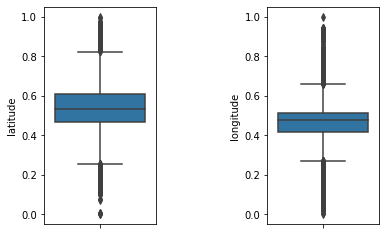

In [671]:
#check apakah terdapat outliers pada data model 1
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["latitude"], ax=axes[0])
sns.boxplot(y=df["longitude"], ax=axes[1])
plt.subplots_adjust(wspace=1)

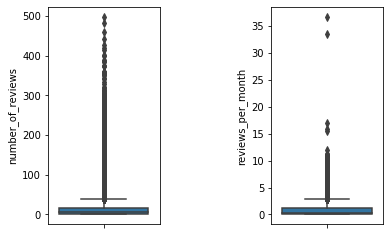

In [672]:
#check apakah terdapat outliers pada data model 2
f, axes = plt.subplots(1, 2)
sns.boxplot(y=data["number_of_reviews"], ax=axes[0])
sns.boxplot(y=data["reviews_per_month"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [673]:
#membersihkan outliers dengan metode Trimming model 1
index = df[(df['latitude'] >= 0.8525)|(df['latitude'] <= 0.275)].index
df.drop(index, inplace=True)
df['latitude'].describe()

index = df[(df['longitude'] >= 0.625)|(df['longitude'] <= 0.3)].index
df.drop(index, inplace=True)
df['longitude'].describe()

count    21061.000000
mean         0.465714
std          0.067336
min          0.300025
25%          0.423121
50%          0.480176
75%          0.512074
max          0.624972
Name: longitude, dtype: float64

In [674]:
#handle outlier 
#latitude
#for model 2

qla1, qla3 = np.percentile(data['number_of_reviews'],[25,75])
iqrla = qla3 - qla1
lowerla = qla1 - (1.5 * iqrla)
upperla = qla3 + (1.5 * iqrla)
outlierla = data[(data['number_of_reviews'] < (lowerla)) | (data['number_of_reviews'] > (upperla))]
print('amount of outlier data',outlierla.shape[0] ) #amount of outlier data
idxla = data[(data['number_of_reviews'] < (lowerla)) | (data['number_of_reviews'] > (upperla))].index
# midla = np.median(clusterr['latitude'])
# clusterr.loc[idxla,'latitude'] = midla #impute with median
data.drop(idxla, inplace=True) #drop outlier data
data['number_of_reviews'].describe()
# print('mid',midla)


amount of outlier data 2864


count    19688.000000
mean         6.902072
std          8.604667
min          0.000000
25%          1.000000
50%          3.000000
75%         10.000000
max         38.000000
Name: number_of_reviews, dtype: float64

In [675]:
#handle outlier 
#latitude
#for model 2

qla1, qla3 = np.percentile(data['reviews_per_month'],[25,75])
iqrla = qla3 - qla1
lowerla = qla1 - (1.5 * iqrla)
upperla = qla3 + (1.5 * iqrla)
outlierla = data[(data['reviews_per_month'] < (lowerla)) | (data['reviews_per_month'] > (upperla))]
print('amount of outlier data',outlierla.shape[0] ) #amount of outlier data
idxla = data[(data['reviews_per_month'] < (lowerla)) | (data['reviews_per_month'] > (upperla))].index
# midla = np.median(clusterr['latitude'])
# clusterr.loc[idxla,'latitude'] = midla #impute with median
data.drop(idxla, inplace=True) #drop outlier data
data['reviews_per_month'].describe()
# print('mid',midla)


amount of outlier data 1878


count    17810.000000
mean         0.376307
std          0.437126
min          0.010000
25%          0.030000
50%          0.190000
75%          0.560000
max          1.910000
Name: reviews_per_month, dtype: float64

In [676]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah reviews_per_month
#model 2
float_array = data['reviews_per_month'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
data['reviews_per_month'] = scaled_array

In [677]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah number_of_reviews
#model 2
float_array = data['number_of_reviews'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
data['number_of_reviews'] = scaled_array

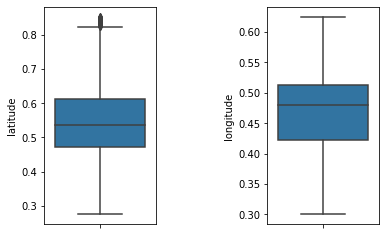

In [678]:
#check apakah terdapat outliers pada data
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["latitude"], ax=axes[0])
sns.boxplot(y=df["longitude"], ax=axes[1])
plt.subplots_adjust(wspace=1)

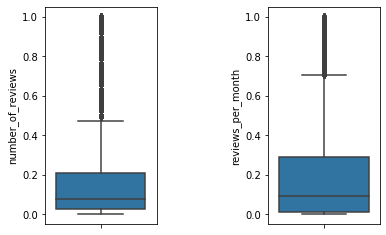

In [679]:
#check apakah terdapat outliers pada data
f, axes = plt.subplots(1, 2)
sns.boxplot(y=data["number_of_reviews"], ax=axes[0])
sns.boxplot(y=data["reviews_per_month"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [680]:
#encode 
from sklearn import preprocessing

encode = preprocessing.LabelEncoder()
df['neighbourhood_group'] = encode.fit_transform(df['neighbourhood_group'])
df['neighbourhood'] = encode.fit_transform(df['neighbourhood'])

df.head()

,neighbourhood_group,neighbourhood,latitude,longitude
0,3,12,0.617046,0.457127
1,5,61,0.662737,0.460179
2,5,64,0.618546,0.480093
3,8,74,0.500386,0.375345
4,5,27,0.645228,0.476290


In [681]:
#encode 
from sklearn import preprocessing

encode = preprocessing.LabelEncoder()
data['room_type'] = encode.fit_transform(data['room_type'])

data.head()

,room_type,price,number_of_reviews,reviews_per_month
1,1,17,0.157895,0.742105
3,1,26,0.657895,0.200000
5,0,180,0.157895,0.073684
6,0,70,0.605263,0.115789
7,1,120,0.000000,0.010526


In [682]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah neighbourhood_group
float_array = df['neighbourhood_group'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df['neighbourhood_group'] = scaled_array

In [683]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah neighbourhood_group
float_array = df['neighbourhood'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df['neighbourhood'] = scaled_array

In [684]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah price
float_array = data['price'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
data['price'] = scaled_array

In [685]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah room_type
float_array = data['room_type'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
data['room_type'] = scaled_array

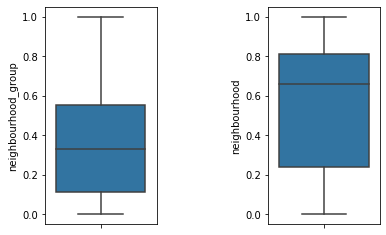

In [686]:
#cek apakah terdapat outliers
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["neighbourhood_group"], ax=axes[0])
sns.boxplot(y=df["neighbourhood"], ax=axes[1])
plt.subplots_adjust(wspace=1)

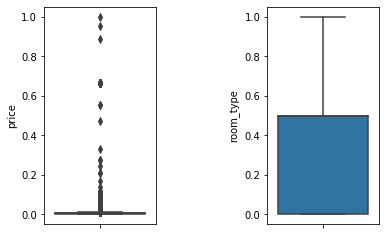

In [687]:
#cek apakah terdapat outliers
f, axes = plt.subplots(1, 2)
sns.boxplot(y=data["price"], ax=axes[0])
sns.boxplot(y=data["room_type"], ax=axes[1])
plt.subplots_adjust(wspace=1)

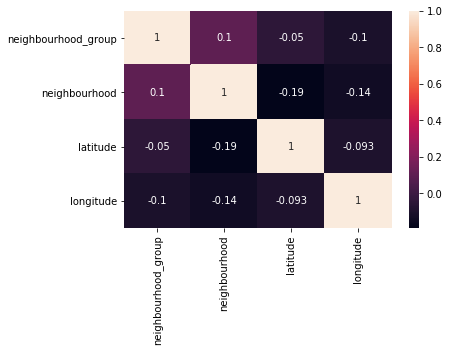

In [688]:
#check correlation
sns.heatmap(df.corr(), vmax=1, annot=True)

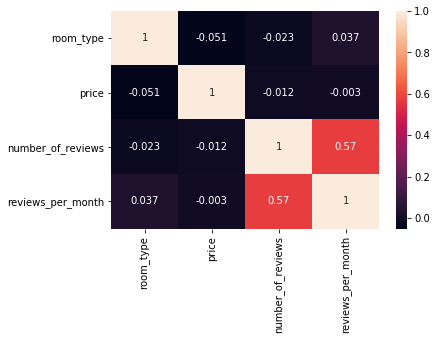

In [689]:
#check correlation
sns.heatmap(data.corr(), vmax=1, annot=True)

# **CLUSTERING (WITH K MEANS)**

---



**MODEL 1**

*attribut yang digunakan adalah latitude dan longitude*
Menentukan lokasi hotel airbnb bedasarkan latitude dan longitudenya

In [690]:
#Menentukan nilai k yang paling optimal dengan elbow method
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

K = range(1,10) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_


In [691]:
#Print nilai dari masing masing k
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.05446654898394321
2 : 0.039585791803821664
3 : 0.03196121094683337
4 : 0.029835005039428167
5 : 0.02751761754995406
6 : 0.023975851276999444
7 : 0.02119726756884633
8 : 0.02026336277756095
9 : 0.01965163972291164


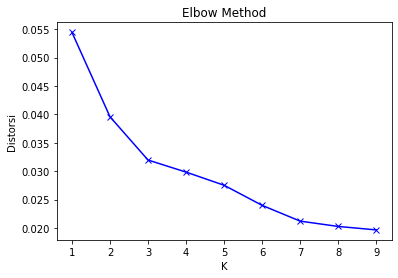

In [692]:
# Plot grafik elbow method
plt.plot(K, distortions, 'bx-') 
plt.xlabel('K') 
plt.ylabel('Distorsi') 
plt.title('Elbow Method') 
plt.show() 

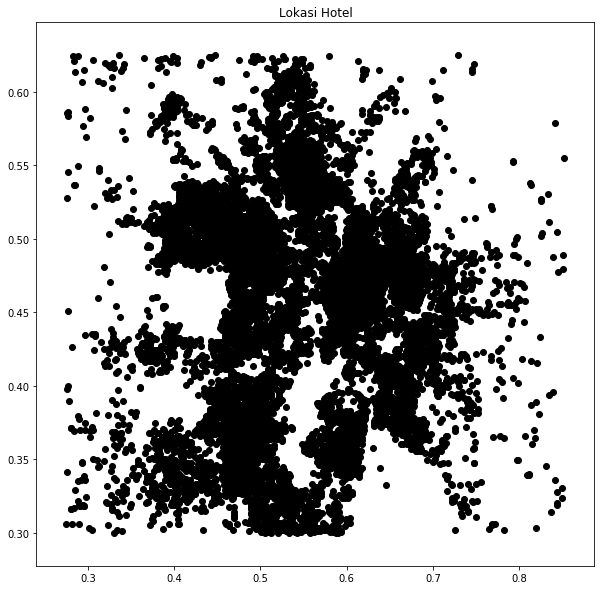

In [693]:
fig = plt.figure(figsize=(10, 10))
plt.title('Lokasi Hotel')
plt.scatter(df['latitude'], df['longitude'], color='k')

In [694]:
#Memilih titik awal centroid sebanyak k
def pilih_centroids():
  k = 4
  inicentroid = {
      i + 1 : [random.choices(df['latitude']),random.choices(df['longitude'])]
      for i in range(k)
  }
  return inicentroid

In [695]:
#Mengelompokkan data bedasarkan jarak terdekatnya dengan masing-masing centroid
def pengelompokan(df, centroids):
    for i in centroids.keys():
        df['jarak_{}'.format(i)] = (np.sqrt((df['latitude'] - centroids[i][0]) ** 2 + (df['longitude'] - centroids[i][1]) ** 2))
    
    jarak_centroid = ['jarak_{}'.format(i) for i in centroids.keys()]
    df['lokasi'] = df.loc[:, jarak_centroid].idxmin(axis=1)
    df['lokasi'] = df['lokasi'].map(lambda x: int(x.lstrip('jarak_')))
    df['warna'] = df['lokasi'].map(lambda x: colmap[x])

    return df

In [696]:
#Menentukan titik centroid baru
def centroidBaru(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['lokasi'] == i]['latitude'])
        centroids[i][1] = np.mean(df[df['lokasi'] == i]['longitude'])
    return k

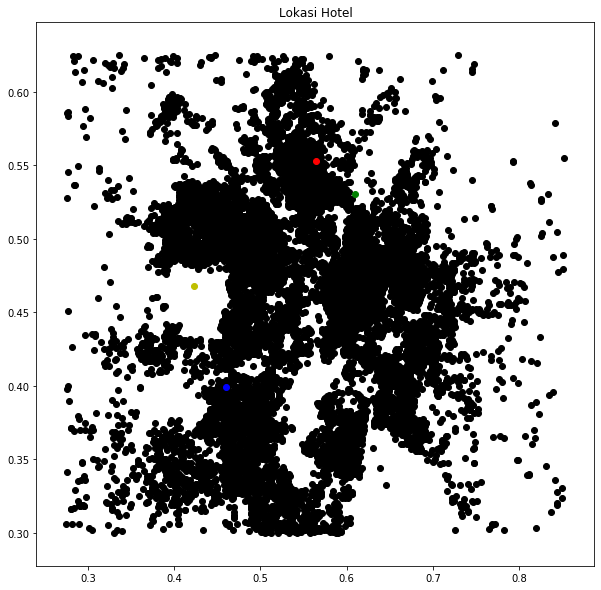

In [697]:
#titik awal centroid
centroids = pilih_centroids()
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['latitude'], df['longitude'], color='k')
colmap = {1: 'b', 2: 'y', 3: 'r', 4: 'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.title('Lokasi Hotel')
plt.show()

In [698]:
df = pengelompokan(df, centroids)

In [699]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,jarak_1,jarak_2,jarak_3,jarak_4,lokasi,warna
0,0.333333,0.131868,0.617046,0.457127,0.167629,0.193920,0.109712,0.073486,4,g
1,0.555556,0.670330,0.662737,0.460179,0.211963,0.239442,0.135603,0.087774,4,g
2,0.555556,0.703297,0.618546,0.480093,0.178202,0.195531,0.091172,0.050912,4,g
3,0.888889,0.813187,0.500386,0.375345,0.047233,0.120189,0.188916,0.189717,1,b
4,0.555556,0.296703,0.645228,0.476290,0.200860,0.221984,0.111811,0.064510,4,g
...,...,...,...,...,...,...,...,...,...,...
22547,0.333333,0.131868,0.614848,0.454335,0.164613,0.191898,0.111144,0.076091,4,g
22548,0.888889,0.813187,0.491742,0.364144,0.047592,0.124027,0.202422,0.203854,1,b
22549,0.555556,0.703297,0.608096,0.471564,0.165046,0.184726,0.092752,0.058729,4,g
22550,0.333333,0.010989,0.572139,0.420635,0.114444,0.155982,0.132813,0.115949,1,b


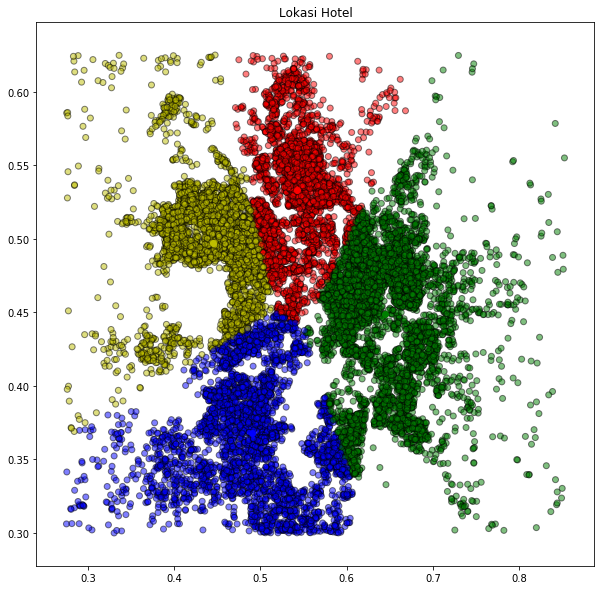

In [700]:
#Mewarnai data sesuai pengelompokannya hingga nilai centroid selalu diperbarui dan tidak berubah lagi
cluster = []
while True:
    centroid_terdekat = df['lokasi'].copy(deep=True)
    centroids = centroidBaru(centroids)
    df = pengelompokan(df, centroids)
#     cluster.append(df)
#     df['hasilcluster'] = cluster
    
    if centroid_terdekat.equals(df['lokasi']):
        break

fig = plt.figure(figsize=(10, 10))
plt.scatter(df['latitude'], df['longitude'], color=df['warna'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.title('Lokasi Hotel')
plt.show()

**MODEL 2**

*Sama-sama menggunakan kmeans tetapi attribut yang digunakan adalah number_of_reviews dan reviews_per_month*
Menentukan kualitas hotel air bnb bedasarkan reviews_per_month dan number_of_reviews

In [701]:
#Menentukan nilai k yang paling optimal dengan elbow method
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

K = range(1,10) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(Y) 
    kmeanModel.fit(Y)     
      
    distortions.append(sum(np.min(cdist(Y, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / Y.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_


In [702]:
#Print nilai dari masing masing k
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 36.84108373909787
2 : 44.401180428071804
3 : 23.3844299897294
4 : 13.398294330180166
5 : 20.92207529749413
6 : 12.571963423031521
7 : 12.688628912863953
8 : 16.800771904923852
9 : 11.877660531617817


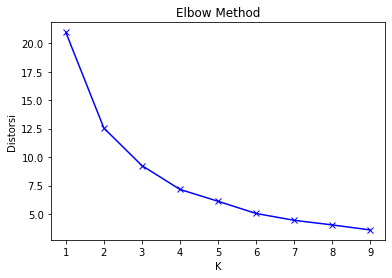

In [703]:
# Plot grafik elbow method
plt.plot(K, distortions, 'bx-') 
plt.xlabel('K') 
plt.ylabel('Distorsi') 
plt.title('Elbow Method') 
plt.show() 

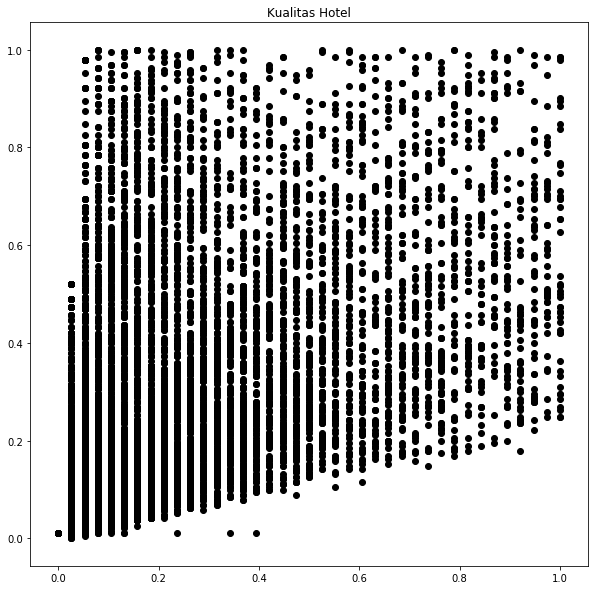

In [704]:
fig = plt.figure(figsize=(10, 10))
plt.title('Kualitas Hotel')
plt.scatter(data['number_of_reviews'], data['reviews_per_month'], color='k')

In [705]:
#Memilih titik awal centroid sebanyak k
def pilih_centroids():
  k = 4
  inicentroid = {
      i + 1 : [random.choices(data['number_of_reviews']),random.choices(data['reviews_per_month'])]
      for i in range(k)
  }
  return inicentroid

In [706]:
#Mengelompokkan data bedasarkan jarak terdekatnya dengan masing-masing centroid
def pengelompokan(data, centroids):
    for i in centroids.keys():
        data['jarak_{}'.format(i)] = (np.sqrt((data['number_of_reviews'] - centroids[i][0]) ** 2 + (data['reviews_per_month'] - centroids[i][1]) ** 2))
    
    jarak_centroid = ['jarak_{}'.format(i) for i in centroids.keys()]
    data['kualitas'] = data.loc[:, jarak_centroid].idxmin(axis=1)
    data['kualitas'] = data['kualitas'].map(lambda x: int(x.lstrip('jarak_')))
    data['warna'] = data['kualitas'].map(lambda x: colmap[x])

    return data

In [707]:
#Menentukan titik centroid baru
def centroidBaru(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['kualitas'] == i]['number_of_reviews'])
        centroids[i][1] = np.mean(data[data['kualitas'] == i]['reviews_per_month'])
    return k


In [708]:
data

,room_type,price,number_of_reviews,reviews_per_month
1,0.5,0.001889,0.157895,0.742105
3,0.5,0.002889,0.657895,0.200000
5,0.0,0.020000,0.157895,0.073684
6,0.0,0.007778,0.605263,0.115789
7,0.5,0.013333,0.000000,0.010526
...,...,...,...,...
22547,0.0,0.006667,0.000000,0.010526
22548,1.0,0.002222,0.000000,0.010526
22549,0.0,0.009444,0.000000,0.010526
22550,0.5,0.011000,0.000000,0.010526


In [709]:
data = pengelompokan(data, centroids)

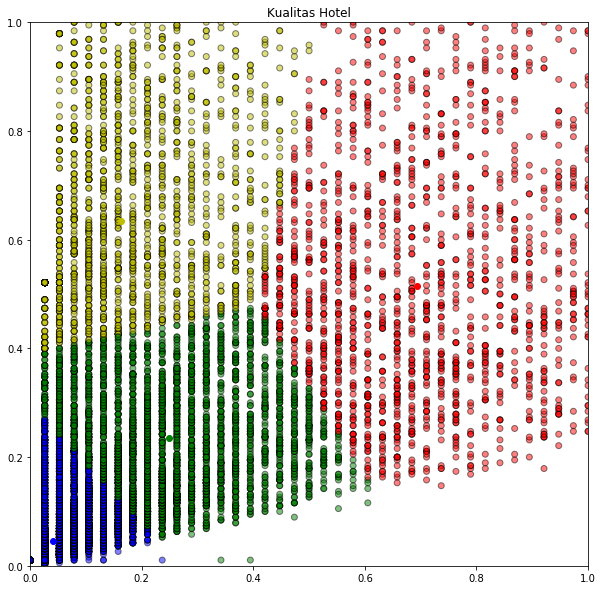

In [710]:
#Mewarnai data sesuai pengelompokannya hingga nilai centroid selalu diperbarui dan tidak berubah lagi
cluster = []
while True:
    centroid_terdekat = data['kualitas'].copy(deep=True)
    centroids = centroidBaru(centroids)
    data = pengelompokan(data, centroids)
#     cluster.append(df)
#     df['hasilcluster'] = cluster
    
    if centroid_terdekat.equals(data['kualitas']):
        break

fig = plt.figure(figsize=(10, 10))
plt.scatter(data['number_of_reviews'], data['reviews_per_month'], color=data['warna'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Kualitas Hotel')
plt.show()

# **CLASSIFICATION**

---



In [711]:
del df['warna']
del df['jarak_1']
del df['jarak_2']
del df['jarak_3']
del df['jarak_4']

In [712]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,lokasi
0,0.333333,0.131868,0.617046,0.457127,4
1,0.555556,0.670330,0.662737,0.460179,4
2,0.555556,0.703297,0.618546,0.480093,4
3,0.888889,0.813187,0.500386,0.375345,1
4,0.555556,0.296703,0.645228,0.476290,4
...,...,...,...,...,...
22547,0.333333,0.131868,0.614848,0.454335,4
22548,0.888889,0.813187,0.491742,0.364144,1
22549,0.555556,0.703297,0.608096,0.471564,4
22550,0.333333,0.010989,0.572139,0.420635,4


In [713]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split as tr
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pr
from sklearn.metrics import recall_score as rec

In [714]:
fitur = pd.DataFrame({
    'latitude' : df["latitude"],
    'longitude': df["longitude"],
    'neighbourhood_group' : df["neighbourhood_group"],
    'neighbourhood' : df["neighbourhood"]
})

In [715]:
kelas = df["lokasi"]

In [716]:
fitur.head()

,latitude,longitude,neighbourhood_group,neighbourhood
0,0.617046,0.457127,0.333333,0.131868
1,0.662737,0.460179,0.555556,0.670330
2,0.618546,0.480093,0.555556,0.703297
3,0.500386,0.375345,0.888889,0.813187
4,0.645228,0.476290,0.555556,0.296703


In [717]:
kelas.head()

0    4
1    4
2    4
3    1
4    4
Name: lokasi, dtype: int64

In [718]:
# from sklearn.datasets import load_iris

In [719]:
#splitting into training and testing
ftrain, ftest, ktrain, ktest = tr(fitur, kelas, test_size=0.2, random_state=1) # 80% data train, 20% data test

In [720]:
ftrain.head()

,latitude,longitude,neighbourhood_group,neighbourhood
20920,0.472808,0.407421,0.888889,0.813187
5920,0.609210,0.506994,0.555556,0.692308
6974,0.652987,0.390412,0.333333,0.901099
3944,0.596770,0.350871,0.333333,0.461538
17238,0.619627,0.485924,0.555556,0.703297


In [721]:
ftest.head()

,latitude,longitude,neighbourhood_group,neighbourhood
9393,0.719977,0.436324,0.333333,0.560440
19785,0.440413,0.495597,0.444444,0.516484
8913,0.434019,0.523247,0.444444,0.736264
17663,0.465202,0.337180,0.000000,0.890110
4437,0.626136,0.509590,0.555556,0.681319


In [722]:
ktrain.head()

20920    1
5920     4
6974     4
3944     1
17238    4
Name: lokasi, dtype: int64

In [723]:
ktest.head()

9393     4
19785    2
8913     2
17663    1
4437     4
Name: lokasi, dtype: int64

In [724]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dt = dt.fit(ftrain,ktrain)

#Predict the response for test dataset
cd_predict = dt.predict(ftest)
print("Class Prediction\n")
for i in range(len(cd_predict)):
    print(cd_predict[i])

Class Prediction

4
2
2
1
4
2
2
2
3
1
4
3
1
1
1
3
3
4
4
4
2
2
1
1
3
2
1
2
4
1
4
4
4
4
3
4
4
2
2
4
1
2
4
2
3
2
2
4
4
4
1
2
4
2
4
2
4
4
4
3
3
3
1
1
2
1
1
2
4
3
3
3
1
3
3
3
4
4
1
3
2
3
1
2
3
2
3
4
3
2
3
1
1
4
4
1
4
3
1
2
3
1
2
3
1
3
1
2
2
3
1
4
3
1
2
2
2
4
4
4
3
3
1
4
2
3
3
3
3
3
4
4
2
1
3
1
4
2
2
4
4
2
1
3
3
3
4
1
4
3
4
4
4
3
4
2
2
2
3
2
3
3
1
3
2
1
4
4
4
1
4
2
2
3
1
3
3
3
4
1
3
4
2
2
2
2
4
4
4
1
2
1
1
4
4
3
3
4
4
1
1
3
3
2
2
4
4
4
4
2
3
2
4
3
3
4
3
2
3
2
4
1
4
1
4
2
3
1
4
2
4
2
4
2
2
4
3
3
4
2
1
3
4
1
1
4
1
3
2
3
3
3
3
4
1
4
2
4
1
2
4
3
1
2
2
4
4
2
4
2
4
1
4
4
3
2
3
4
3
3
4
4
2
1
3
4
4
2
2
4
4
3
4
2
4
2
3
4
4
3
3
2
1
3
2
1
2
2
2
4
3
4
4
2
2
3
2
2
3
4
4
3
3
2
1
4
4
4
4
1
1
2
2
2
4
3
2
4
3
1
2
2
4
1
4
3
4
1
2
1
4
4
2
4
3
1
2
4
3
3
4
1
3
3
1
3
2
3
4
4
1
2
2
4
4
3
2
1
3
3
3
2
4
2
4
2
1
4
4
2
1
1
4
2
1
4
4
4
3
4
4
3
2
3
2
4
4
4
2
4
2
4
3
4
1
2
1
1
2
1
4
2
2
1
3
1
2
4
1
4
4
4
4
3
3
4
2
3
2
1
1
3
1
3
1
4
4
4
4
4
3
4
2
3
4
3
4
2
1
1
2
1
2
4
1
4
4
3
3
4
3
4
2
4
4
4
4
4
4
2
2
3
4
1
4
4
4
1
3
2
4


Text(0, 0.5, 'Predictions')

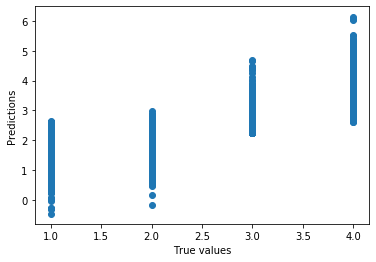

In [725]:
from sklearn.linear_model import LinearRegression as lm

#We fit our model on the train data to make predictions on it. Let’s import the linear_model from sklearn, apply linear regression to the dataset, and plot the results.

model=lm().fit(ftrain,ktrain)
predictions=model.predict(ftest)
import matplotlib.pyplot as plt
plt.scatter(ktest,predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [726]:
# Accuracy score
print("DECISION TREE\n")

print("F1-SCORE ",f1(ktest,cd_predict,average='macro'))

print("ACCURACY ",acc(ktest,cd_predict))

print("PRECISION ",pr(ktest,cd_predict,average='macro'))

print("RECALL",rec(ktest,cd_predict,average='macro'))

DECISION TREE

F1-SCORE  0.9576605538580247
ACCURACY  0.9596487063849988
PRECISION  0.9554047893506743
RECALL 0.9606301488258


In [727]:
del data['warna']
del data['jarak_1']
del data['jarak_2']
del data['jarak_3']
del data['jarak_4']

In [728]:
data

,room_type,price,number_of_reviews,reviews_per_month,kualitas
1,0.5,0.001889,0.157895,0.742105,2
3,0.5,0.002889,0.657895,0.200000,3
5,0.0,0.020000,0.157895,0.073684,1
6,0.0,0.007778,0.605263,0.115789,4
7,0.5,0.013333,0.000000,0.010526,1
...,...,...,...,...,...
22547,0.0,0.006667,0.000000,0.010526,1
22548,1.0,0.002222,0.000000,0.010526,1
22549,0.0,0.009444,0.000000,0.010526,1
22550,0.5,0.011000,0.000000,0.010526,1


In [729]:
fitur = pd.DataFrame({
    'number_of_reviews' : data["number_of_reviews"],
    'reviews_per_month': data["reviews_per_month"],
    'price' : data["price"],
    'room_type' : data["room_type"]
})

In [730]:
fitur.head()

,number_of_reviews,reviews_per_month,price,room_type
1,0.157895,0.742105,0.001889,0.5
3,0.657895,0.200000,0.002889,0.5
5,0.157895,0.073684,0.020000,0.0
6,0.605263,0.115789,0.007778,0.0
7,0.000000,0.010526,0.013333,0.5


In [731]:
kelas = data["kualitas"]

In [732]:
kelas.head()

1    2
3    3
5    1
6    4
7    1
Name: kualitas, dtype: int64

In [733]:
# #splitting into training and testing
# ftrain, ftest, ktrain, ktest = tr(fitur, kelas, test_size=0.2, random_state=1) # 80% data train, 20% data test

In [734]:
iris=load_iris()
fitur,kelas=iris.data,iris.target
ftrain,ftest,ktrain,ktest=tr(fitur,kelas,train_size=0.5,test_size=0.5,random_state=123)
#ktest

In [735]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dt = dt.fit(ftrain,ktrain)

#Predict the response for test dataset
cd_predict = dt.predict(ftest)
print("Class Prediction\n")
for i in range(len(cd_predict)):
    print(cd_predict[i])

Class Prediction

1
2
2
1
0
1
1
0
0
1
1
0
1
2
2
2
0
0
1
0
0
1
0
1
0
0
0
2
2
0
2
1
0
0
1
1
2
0
0
1
1
0
2
2
2
2
2
1
0
0
1
0
0
1
1
1
1
2
1
2
0
2
1
0
0
2
1
2
2
0
1
1
1
0
2


Text(0, 0.5, 'Predictions')

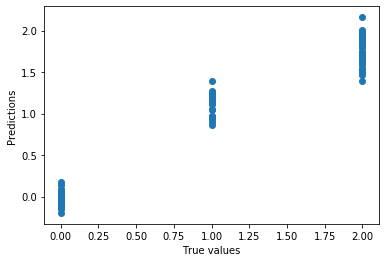

In [736]:
from sklearn.linear_model import LinearRegression as lm

#We fit our model on the train data to make predictions on it. Let’s import the linear_model from sklearn, apply linear regression to the dataset, and plot the results.

model=lm().fit(ftrain,ktrain)
predictions=model.predict(ftest)
import matplotlib.pyplot as plt
plt.scatter(ktest,predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [737]:
# Accuracy score
print("DECISION TREE\n")

print("F1-SCORE ",f1(ktest,cd_predict,average='macro'))

print("ACCURACY ",acc(ktest,cd_predict))

print("PRECISION ",pr(ktest,cd_predict,average='macro'))

print("RECALL",rec(ktest,cd_predict,average='macro'))

DECISION TREE

F1-SCORE  0.9027355623100304
ACCURACY  0.9066666666666666
PRECISION  0.9135802469135802
RECALL 0.9166666666666666
